In [1]:
# Import Python libraries for visualisation and data analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# sns.set_theme()  # Apply the default Seaborn theme
%matplotlib inline

# Suppress warnings to avoid potential confusion
import warnings

# Libraries for statistical and scientific computing
import statsmodels.api as sm
from scipy import stats

warnings.filterwarnings("ignore")
import ipywidgets as widgets
from IPython.display import display

In [2]:
d1=pd.read_csv('2020.csv')  
# d1.set_index('date',inplace=True)
d2=pd.read_csv('2021.csv')  
# d2.set_index('date',inplace=True)
d3=pd.read_csv('2022.csv')  
# d3.set_index('date',inplace=True)

In [3]:
def subperiod_mobility_trends(data, start_date, end_date):
    """
    Add your mobility data in `data`.

    This function selects a subperiod of the mobility data based on prespecified start data and end date.
    """
    subdata= data[
        data["date"].isin(pd.date_range(start=start_date, end=end_date))
    ]
    return subdata


def rename_mobility_trends(data):
    """
    This function renames the column headings of the six mobility categories.
    """
    data = data.rename(
        columns={
            "retail_and_recreation_percent_change_from_baseline": "Retail_Recreation",
            "grocery_and_pharmacy_percent_change_from_baseline": "Grocery_Pharmacy",
            "parks_percent_change_from_baseline": "Parks",
            "transit_stations_percent_change_from_baseline": "Transit_stations",
            "workplaces_percent_change_from_baseline": "Workplaces",
            "residential_percent_change_from_baseline": "Residential",
        }
    )
    return data

In [4]:
d1=rename_mobility_trends(d1)
d2=rename_mobility_trends(d2)
d3=rename_mobility_trends(d3)

In [5]:
d1['year']='2020'
d2['year']='2021'
d3['year']='2022'

In [8]:
data=d1.append(d2)
data=data.append(d3)

In [9]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

# displaying data by year

In [10]:

dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(data.year))
output_year = widgets.Output()

def dropdown_year_eventhandler(change):
    output_year.clear_output()
    with output_year:
        if (change.new == ALL):
            display(data)
        else:
            display(data[data.year == change.new])

dropdown_year.observe(dropdown_year_eventhandler, names='value')
display(dropdown_year)
display(output_year)

Dropdown(options=('ALL', '2020', '2021', '2022'), value='ALL')

Output()

In [11]:
regions=data.sub_region_1.unique()


In [12]:
regions=regions[1:]
variabl=["Retail_Recreation","Grocery_Pharmacy","Parks","Transit_stations","Workplaces","Residential"]

In [13]:
c1 = widgets.Dropdown(options = regions )
c2 = widgets.Dropdown(options = regions )
c3 = widgets.Dropdown(options = regions )
c4 = widgets.Dropdown(options = regions )
c5= widgets.Dropdown(options = variabl )

# plot of data for different cities


In [14]:
display(c1)
display(c2)
display(c3)
display(c4)
display(c5)
btn = widgets.Button(description='plot')
output_plot = widgets.Output()

def btn_eventhandler(obj):
    output_plot.clear_output()
    with output_plot:
        bigcities = data[
        data["sub_region_1"].isin(
            [c1.value, c2.value, c3.value, c4.value]
        )]
        sns.catplot(
        x="sub_region_1",
        y=c5.value ,
        kind="box",
        data=bigcities,
        height=6,
        aspect=1.5,)
        plt.show()
    
btn.on_click(btn_eventhandler)
display(btn)
display(output_plot)

Dropdown(options=('Aberdeen City', 'Aberdeenshire', 'Angus Council', 'Antrim and Newtownabbey', 'Ards and Nort…

Dropdown(options=('Aberdeen City', 'Aberdeenshire', 'Angus Council', 'Antrim and Newtownabbey', 'Ards and Nort…

Dropdown(options=('Aberdeen City', 'Aberdeenshire', 'Angus Council', 'Antrim and Newtownabbey', 'Ards and Nort…

Dropdown(options=('Aberdeen City', 'Aberdeenshire', 'Angus Council', 'Antrim and Newtownabbey', 'Ards and Nort…

Dropdown(options=('Retail_Recreation', 'Grocery_Pharmacy', 'Parks', 'Transit_stations', 'Workplaces', 'Residen…

Button(description='plot', style=ButtonStyle())

Output()

In [15]:
london_data=data.loc[data['sub_region_1'] == 'Greater London']
greater=london_data[london_data['sub_region_2'].isnull()]

In [16]:
london_data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential,year
36253,GB,United Kingdom,Greater London,NaN,NaN,NaN,NaN,ChIJb-IaoQug2EcRi-m4hONz8S8,2020-02-15,-11.0,-8.0,-34.0,-10.0,-3.0,2.0,2020
36254,GB,United Kingdom,Greater London,NaN,NaN,NaN,NaN,ChIJb-IaoQug2EcRi-m4hONz8S8,2020-02-16,-9.0,-11.0,-41.0,-9.0,-4.0,1.0,2020
36255,GB,United Kingdom,Greater London,NaN,NaN,NaN,NaN,ChIJb-IaoQug2EcRi-m4hONz8S8,2020-02-17,11.0,4.0,28.0,-3.0,-13.0,2.0,2020
36256,GB,United Kingdom,Greater London,NaN,NaN,NaN,NaN,ChIJb-IaoQug2EcRi-m4hONz8S8,2020-02-18,4.0,-2.0,11.0,-4.0,-13.0,2.0,2020
36257,GB,United Kingdom,Greater London,NaN,NaN,NaN,NaN,ChIJb-IaoQug2EcRi-m4hONz8S8,2020-02-19,3.0,-3.0,3.0,-5.0,-13.0,3.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14337,GB,United Kingdom,Greater London,Royal Borough of Kingston upon Thames,NaN,GB-KTT,NaN,ChIJ0ycUEikKdkgR6r_eW1XvlAQ,2022-04-03,-24.0,-15.0,46.0,-20.0,-7.0,0.0,2022
14338,GB,United Kingdom,Greater London,Royal Borough of Kingston upon Thames,NaN,GB-KTT,NaN,ChIJ0ycUEikKdkgR6r_eW1XvlAQ,2022-04-04,-23.0,-12.0,NaN,-43.0,-48.0,12.0,2022
14339,GB,United Kingdom,Greater London,Royal Borough of Kingston upon Thames,NaN,GB-KTT,NaN,ChIJ0ycUEikKdkgR6r_eW1XvlAQ,2022-04-05,-22.0,-14.0,NaN,-40.0,-46.0,10.0,2022
14340,GB,United Kingdom,Greater London,Royal Borough of Kingston upon Thames,NaN,GB-KTT,NaN,ChIJ0ycUEikKdkgR6r_eW1XvlAQ,2022-04-06,-26.0,-19.0,23.0,-39.0,-46.0,11.0,2022


In [21]:
# data=data[(data['sub_region_1']=='Greater London') & (data['sub_region_2'].isnull())]['sub_region_2'].replace(np.nan,'all',inplace=True)

In [22]:
# data[(data['sub_region_1']=='Greater London') & (data['sub_region_2'].isnull())]['sub_region_2']

In [23]:
# data.loc[data['sub_region_1'] == 'Greater London']

In [17]:
london_regions=london_data.sub_region_2.unique()
london_regions=london_regions[1:]
variabl=["Retail_Recreation","Grocery_Pharmacy","Parks","Transit_stations","Workplaces","Residential"]

In [18]:
c1 = widgets.Dropdown(options = london_regions )
c2 = widgets.Dropdown(options = london_regions )
c3 = widgets.Dropdown(options = london_regions )
c4 = widgets.Dropdown(options = london_regions )
c5= widgets.Dropdown(options = variabl )

In [19]:
display(c1)
display(c2)
display(c3)
display(c4)
display(c5)
btn = widgets.Button(description='plot')
output_plot = widgets.Output()

def btn_eventhandler(obj):
    output_plot.clear_output()
    with output_plot:
        bigcities = data[
        data["sub_region_2"].isin(
            [c1.value, c2.value, c3.value, c4.value]
        )]
        sns.catplot(
        x="sub_region_2",
        y=c5.value ,
        kind="box",
        data=bigcities,
        height=6,
        aspect=1.5,)
        plt.show()
    
btn.on_click(btn_eventhandler)
display(btn)
display(output_plot)

Dropdown(options=('City of London', 'City of Westminster', 'London Borough of Barking and Dagenham', 'London B…

Dropdown(options=('City of London', 'City of Westminster', 'London Borough of Barking and Dagenham', 'London B…

Dropdown(options=('City of London', 'City of Westminster', 'London Borough of Barking and Dagenham', 'London B…

Dropdown(options=('City of London', 'City of Westminster', 'London Borough of Barking and Dagenham', 'London B…

Dropdown(options=('Retail_Recreation', 'Grocery_Pharmacy', 'Parks', 'Transit_stations', 'Workplaces', 'Residen…

Button(description='plot', style=ButtonStyle())

Output()

In [20]:
london_long = pd.melt(
    london_data,
    id_vars=[ "sub_region_2","date" ],
    # The columns 'date' and 'sub_region_1' are not needed for the box
    # plots below but we will need the two variables in subsequent tasks.
    value_vars=london_data.columns[9:15],
).dropna()

london_long

,sub_region_2,date,variable,value
321,City of London,2020-02-15,Retail_Recreation,-5.0
322,City of London,2020-02-16,Retail_Recreation,-1.0
323,City of London,2020-02-17,Retail_Recreation,-3.0
324,City of London,2020-02-18,Retail_Recreation,-2.0
325,City of London,2020-02-19,Retail_Recreation,-7.0
...,...,...,...,...
159727,Royal Borough of Kingston upon Thames,2022-04-03,Residential,0.0
159728,Royal Borough of Kingston upon Thames,2022-04-04,Residential,12.0
159729,Royal Borough of Kingston upon Thames,2022-04-05,Residential,10.0
159730,Royal Borough of Kingston upon Thames,2022-04-06,Residential,11.0


In [21]:
london_regions=london_data.sub_region_2.unique()
london_regions=london_regions[1:]

In [23]:

c1 = widgets.Dropdown(options = london_regions )
c2 = widgets.Dropdown(options = london_regions )
c3 = widgets.Dropdown(options = london_regions )
c4 = widgets.Dropdown(options = london_regions )
display(c1)
display(c2)
display(c3)
display(c4)
btn = widgets.Button(description='plot')
output_plot = widgets.Output()
def btn_eventhandler(obj):
    output_plot.clear_output()
    with output_plot:
        sub = london_long[
        london_long["sub_region_2"].isin(
            [c1.value, c2.value, c3.value, c4.value]
        )]
    
        sns.catplot(
        x="sub_region_2",
        y="value",
        col="variable",
        col_wrap=2,
        kind="boxen",
        height=6,
        aspect=1.5,
        sharey=False,  
        data=sub,
        )
        plt.show()
        
        
        
#         grid = sns.relplot(
#         x="date",
#         y="value",
#         hue="sub_region_2",
#         col="variable",
#         col_wrap=1,
#         height=6,
#         aspect=4,
#         linewidth=2,
#         ci=99,
#         seed=42,
#         facet_kws={"sharey": False, "sharex": True},
#         kind="line",
#         data=sub,)

#         grid.set(ylabel="Mean mobility change from baseline (%)")
#         grid.set_xticklabels(rotation=45)

#         # For each plot, draw a horizontal line at y = 0 representing the baseline
#         for ax in grid.axes.flat:
#             ax.axhline(color="gray", linestyle="--", lw=2)
        
        
        
        
        
        
        
        
        
btn.on_click(btn_eventhandler)
display(btn)
display(output_plot)

Dropdown(options=('City of London', 'City of Westminster', 'London Borough of Barking and Dagenham', 'London B…

Dropdown(options=('City of London', 'City of Westminster', 'London Borough of Barking and Dagenham', 'London B…

Dropdown(options=('City of London', 'City of Westminster', 'London Borough of Barking and Dagenham', 'London B…

Dropdown(options=('City of London', 'City of Westminster', 'London Borough of Barking and Dagenham', 'London B…

Button(description='plot', style=ButtonStyle())

Output()

In [25]:
 sub = london_long[
        london_long["sub_region_2"].isin(
            [c1.value, c2.value, c3.value, c4.value]
        )]

In [26]:
sub

,sub_region_2,date,variable,value
321,City of London,2020-02-15,Retail_Recreation,-5.0
322,City of London,2020-02-16,Retail_Recreation,-1.0
323,City of London,2020-02-17,Retail_Recreation,-3.0
324,City of London,2020-02-18,Retail_Recreation,-2.0
325,City of London,2020-02-19,Retail_Recreation,-7.0
...,...,...,...,...
159242,London Borough of Tower Hamlets,2022-04-03,Residential,1.0
159243,London Borough of Tower Hamlets,2022-04-04,Residential,14.0
159244,London Borough of Tower Hamlets,2022-04-05,Residential,12.0
159245,London Borough of Tower Hamlets,2022-04-06,Residential,12.0


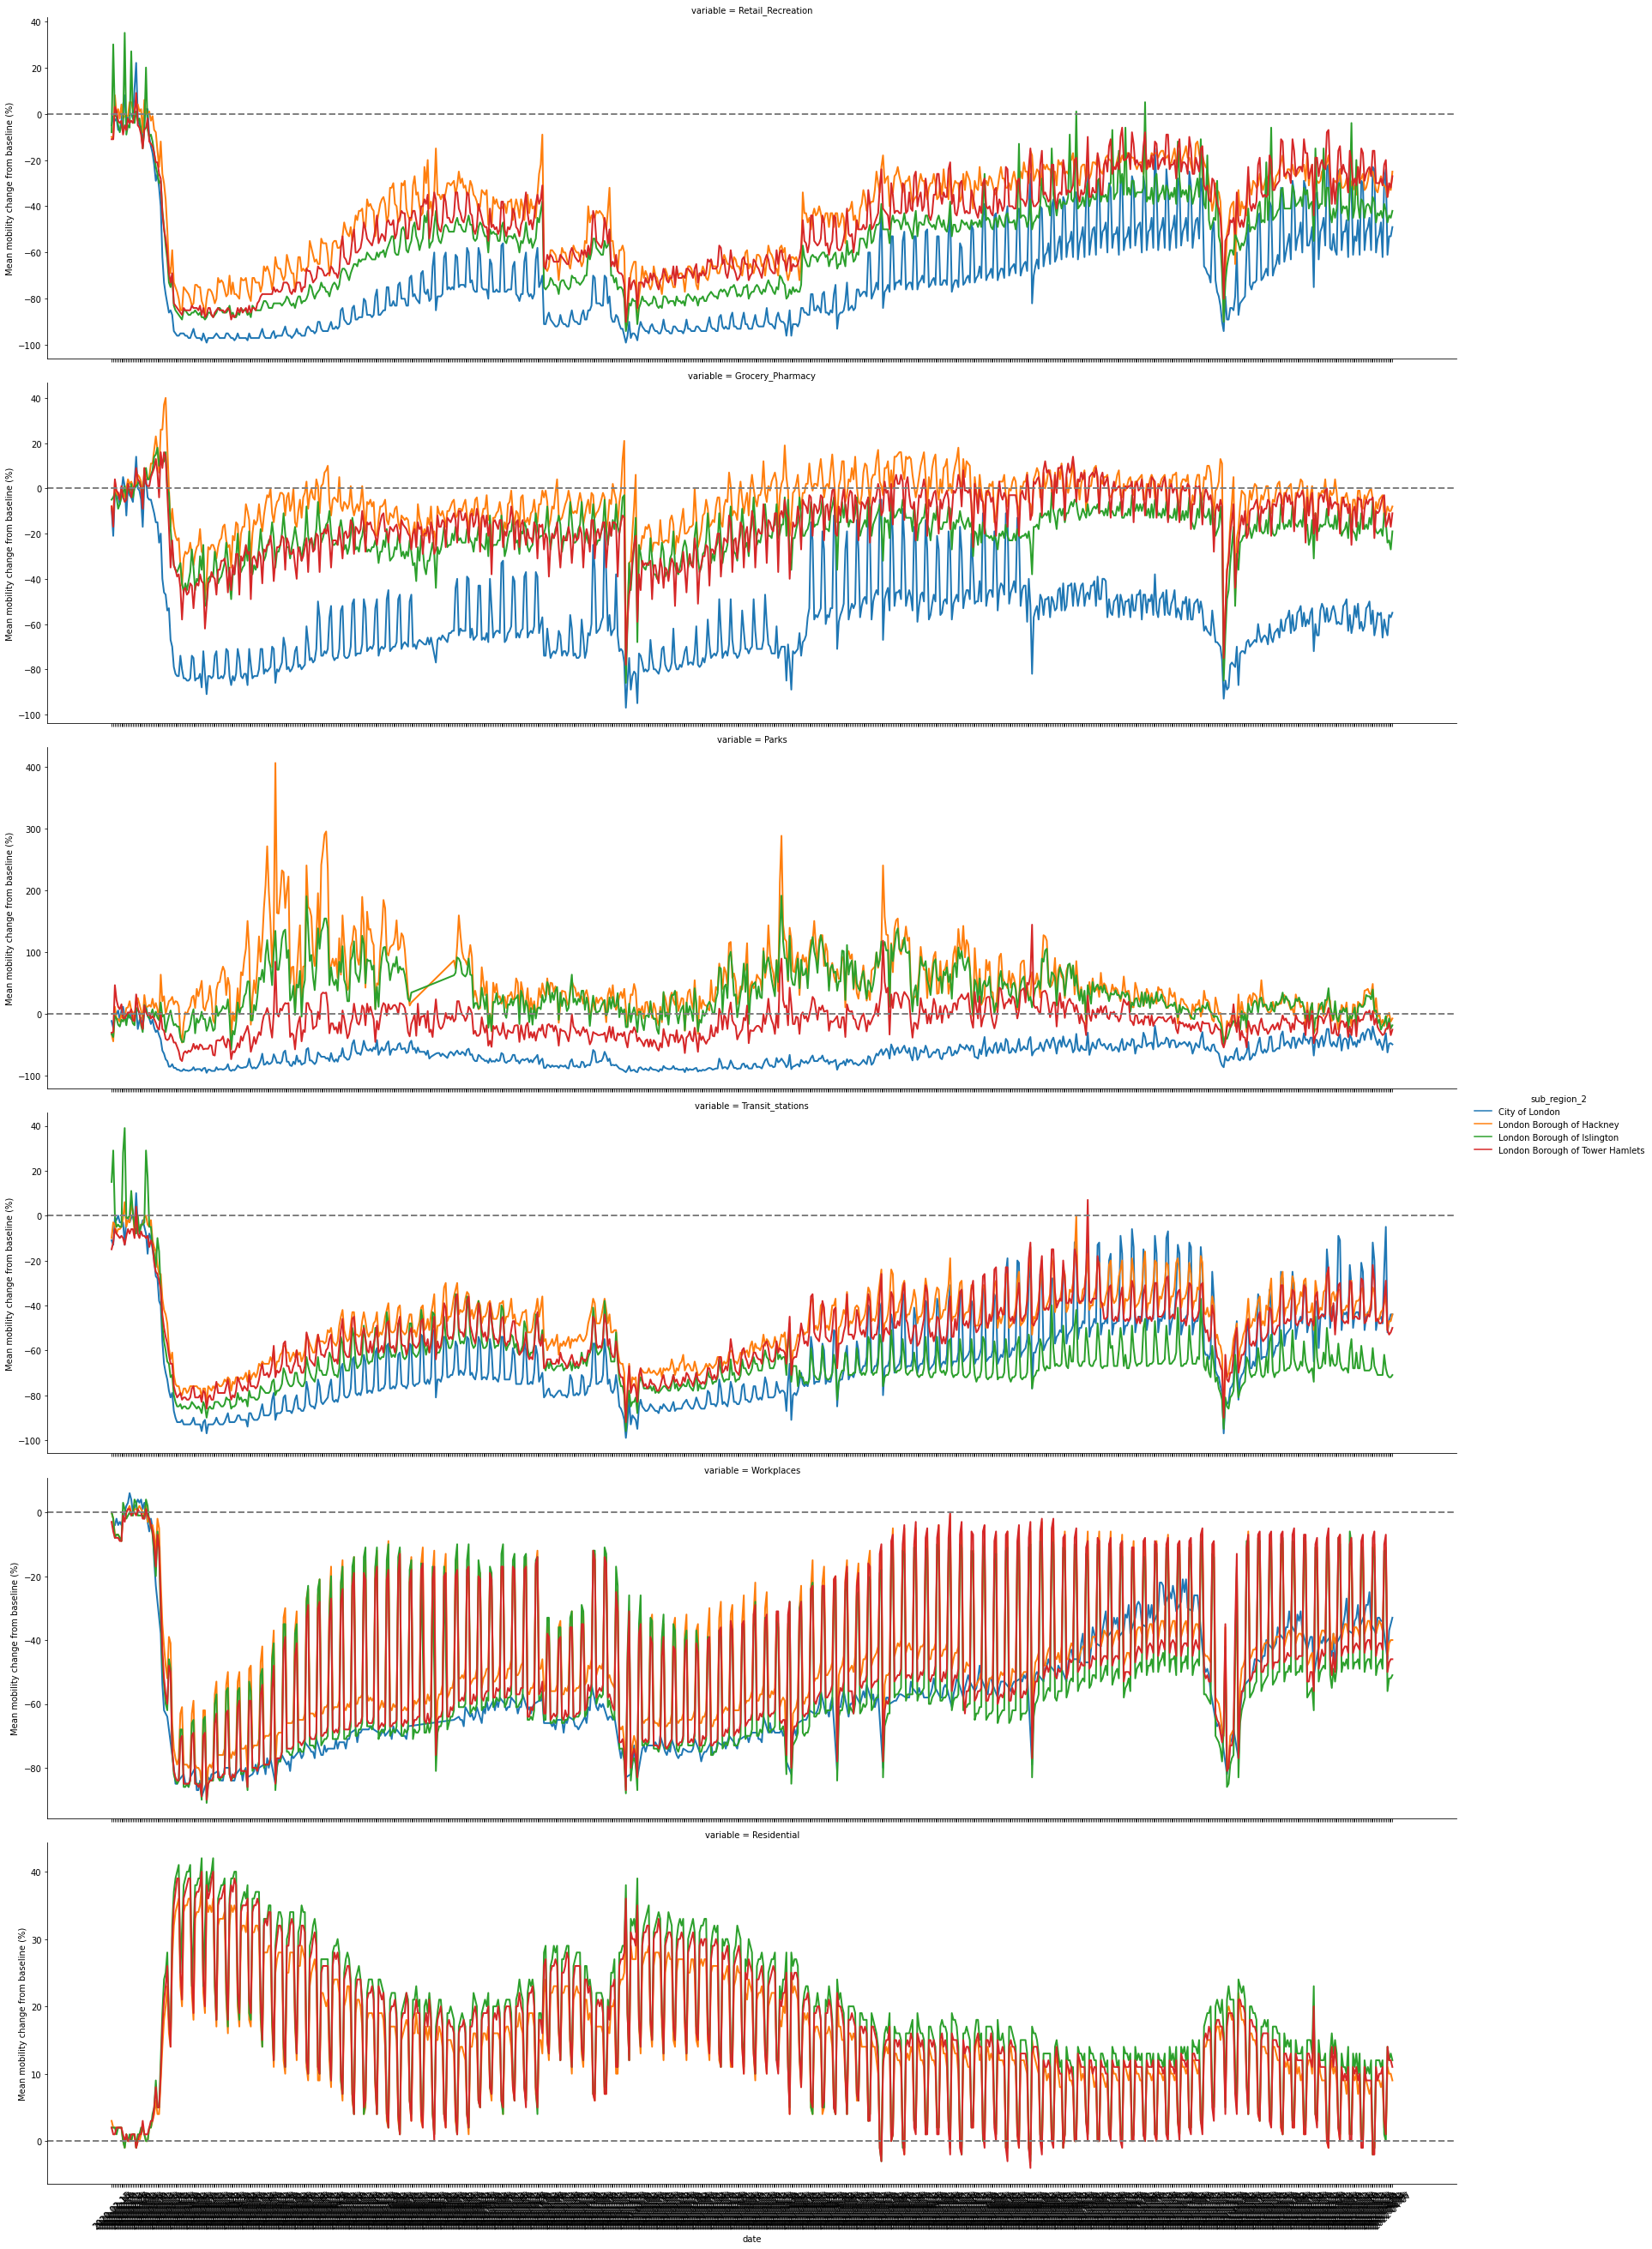

In [27]:
grid = sns.relplot(
    x="date",
    y="value",
    hue="sub_region_2",
    col="variable",
    col_wrap=1,
    height=6,
    aspect=4,
    linewidth=2,
    ci=99,
    seed=42,
    facet_kws={"sharey": False, "sharex": True},
    kind="line",
    data=sub,)

grid.set(ylabel="Mean mobility change from baseline (%)")
grid.set_xticklabels(rotation=45)

#         # For each plot, draw a horizontal line at y = 0 representing the baseline
for ax in grid.axes.flat:
    ax.axhline(color="gray", linestyle="--", lw=2)
        
        

# bootstraping for tower hamlets

In [28]:
from scipy.stats import bootstrap

In [22]:
c=sub[(sub['sub_region_2']=='City of London')]

In [31]:
tower=london_data[london_data["sub_region_2"] == "London Borough of Tower Hamlets"]


In [47]:
b_d={"Retail_Recreation":(np.array(tower.Retail_Recreation),),
      "Grocery_Pharmacy":(np.array(tower.Grocery_Pharmacy),),
      "Parks":(np.array(tower.Parks),),
      "Transit_stations":(np.array(tower.Transit_stations),),
      "Workplaces":(np.array(tower.Workplaces),),
      "Residential":(np.array(tower.Workplaces),),}



In [60]:
for k,v in b_d.items():
    bootstrap_ci = bootstrap(v, np.median, confidence_level=0.95,
                         random_state=1, method='percentile')

    #view 95% boostrapped confidence interval
    print(f"tower hamlets , {k}. median {bootstrap_ci.confidence_interval}.")

tower hamlets , Retail_Recreation. median ConfidenceInterval(low=-48.0, high=-43.0).
tower hamlets , Grocery_Pharmacy. median ConfidenceInterval(low=-15.0, high=-13.0).
tower hamlets , Parks. median ConfidenceInterval(low=-17.0, high=-13.0).
tower hamlets , Transit_stations. median ConfidenceInterval(low=-55.0, high=-52.0).
tower hamlets , Workplaces. median ConfidenceInterval(low=-55.0, high=-51.0).
tower hamlets , Residential. median ConfidenceInterval(low=-55.0, high=-51.0).


# lockdowns analysis

In [61]:
data_long = pd.melt(
    data,
    id_vars=["country_region", "sub_region_1", "date"],
    # The columns 'date' and 'sub_region_1' are not needed for the box
    # plots below but we will need the two variables in subsequent tasks.
    value_vars=data.columns[9:15],
).dropna()


In [62]:
first_lockdown_UK = data_long[
    (data_long["country_region"] == "United Kingdom")
    & (data_long["date"] >= "2020-03-24")
    & (data_long["date"] <= "2020-04-13")
]

second_lockdown_UK = data_long[
    (data_long["country_region"] == "United Kingdom")
    & (data_long["date"] >= "2020-11-05")
    & (data_long["date"] <= "2020-11-25")
]

third_lockdown_UK = data_long[
    (data_long["country_region"] == "United Kingdom")
    & (data_long["date"] >= "2021-01-06")
    & (data_long["date"] <= "2021-01-26")
]

In [66]:
lockdowns_dataframes = [first_lockdown_UK, second_lockdown_UK, third_lockdown_UK]
three_lockdowns_UK = pd.concat(
    lockdowns_dataframes,
    keys=["first_lockdown_UK", "second_lockdown_UK", "third_lockdown_UK"],
).reset_index()


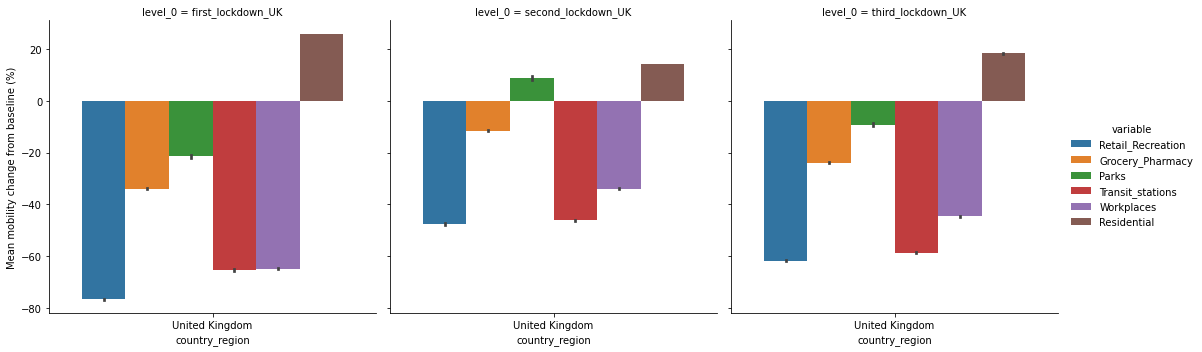

In [67]:
# Display the three lockdowns as a catplot multi-plot
grid = sns.catplot(
    kind="bar",
    x="country_region",
    y="value",
    hue="variable",
    col="level_0",
    data=three_lockdowns_UK,
)
grid.set_ylabels("Mean mobility change from baseline (%)")

# Third lockdown

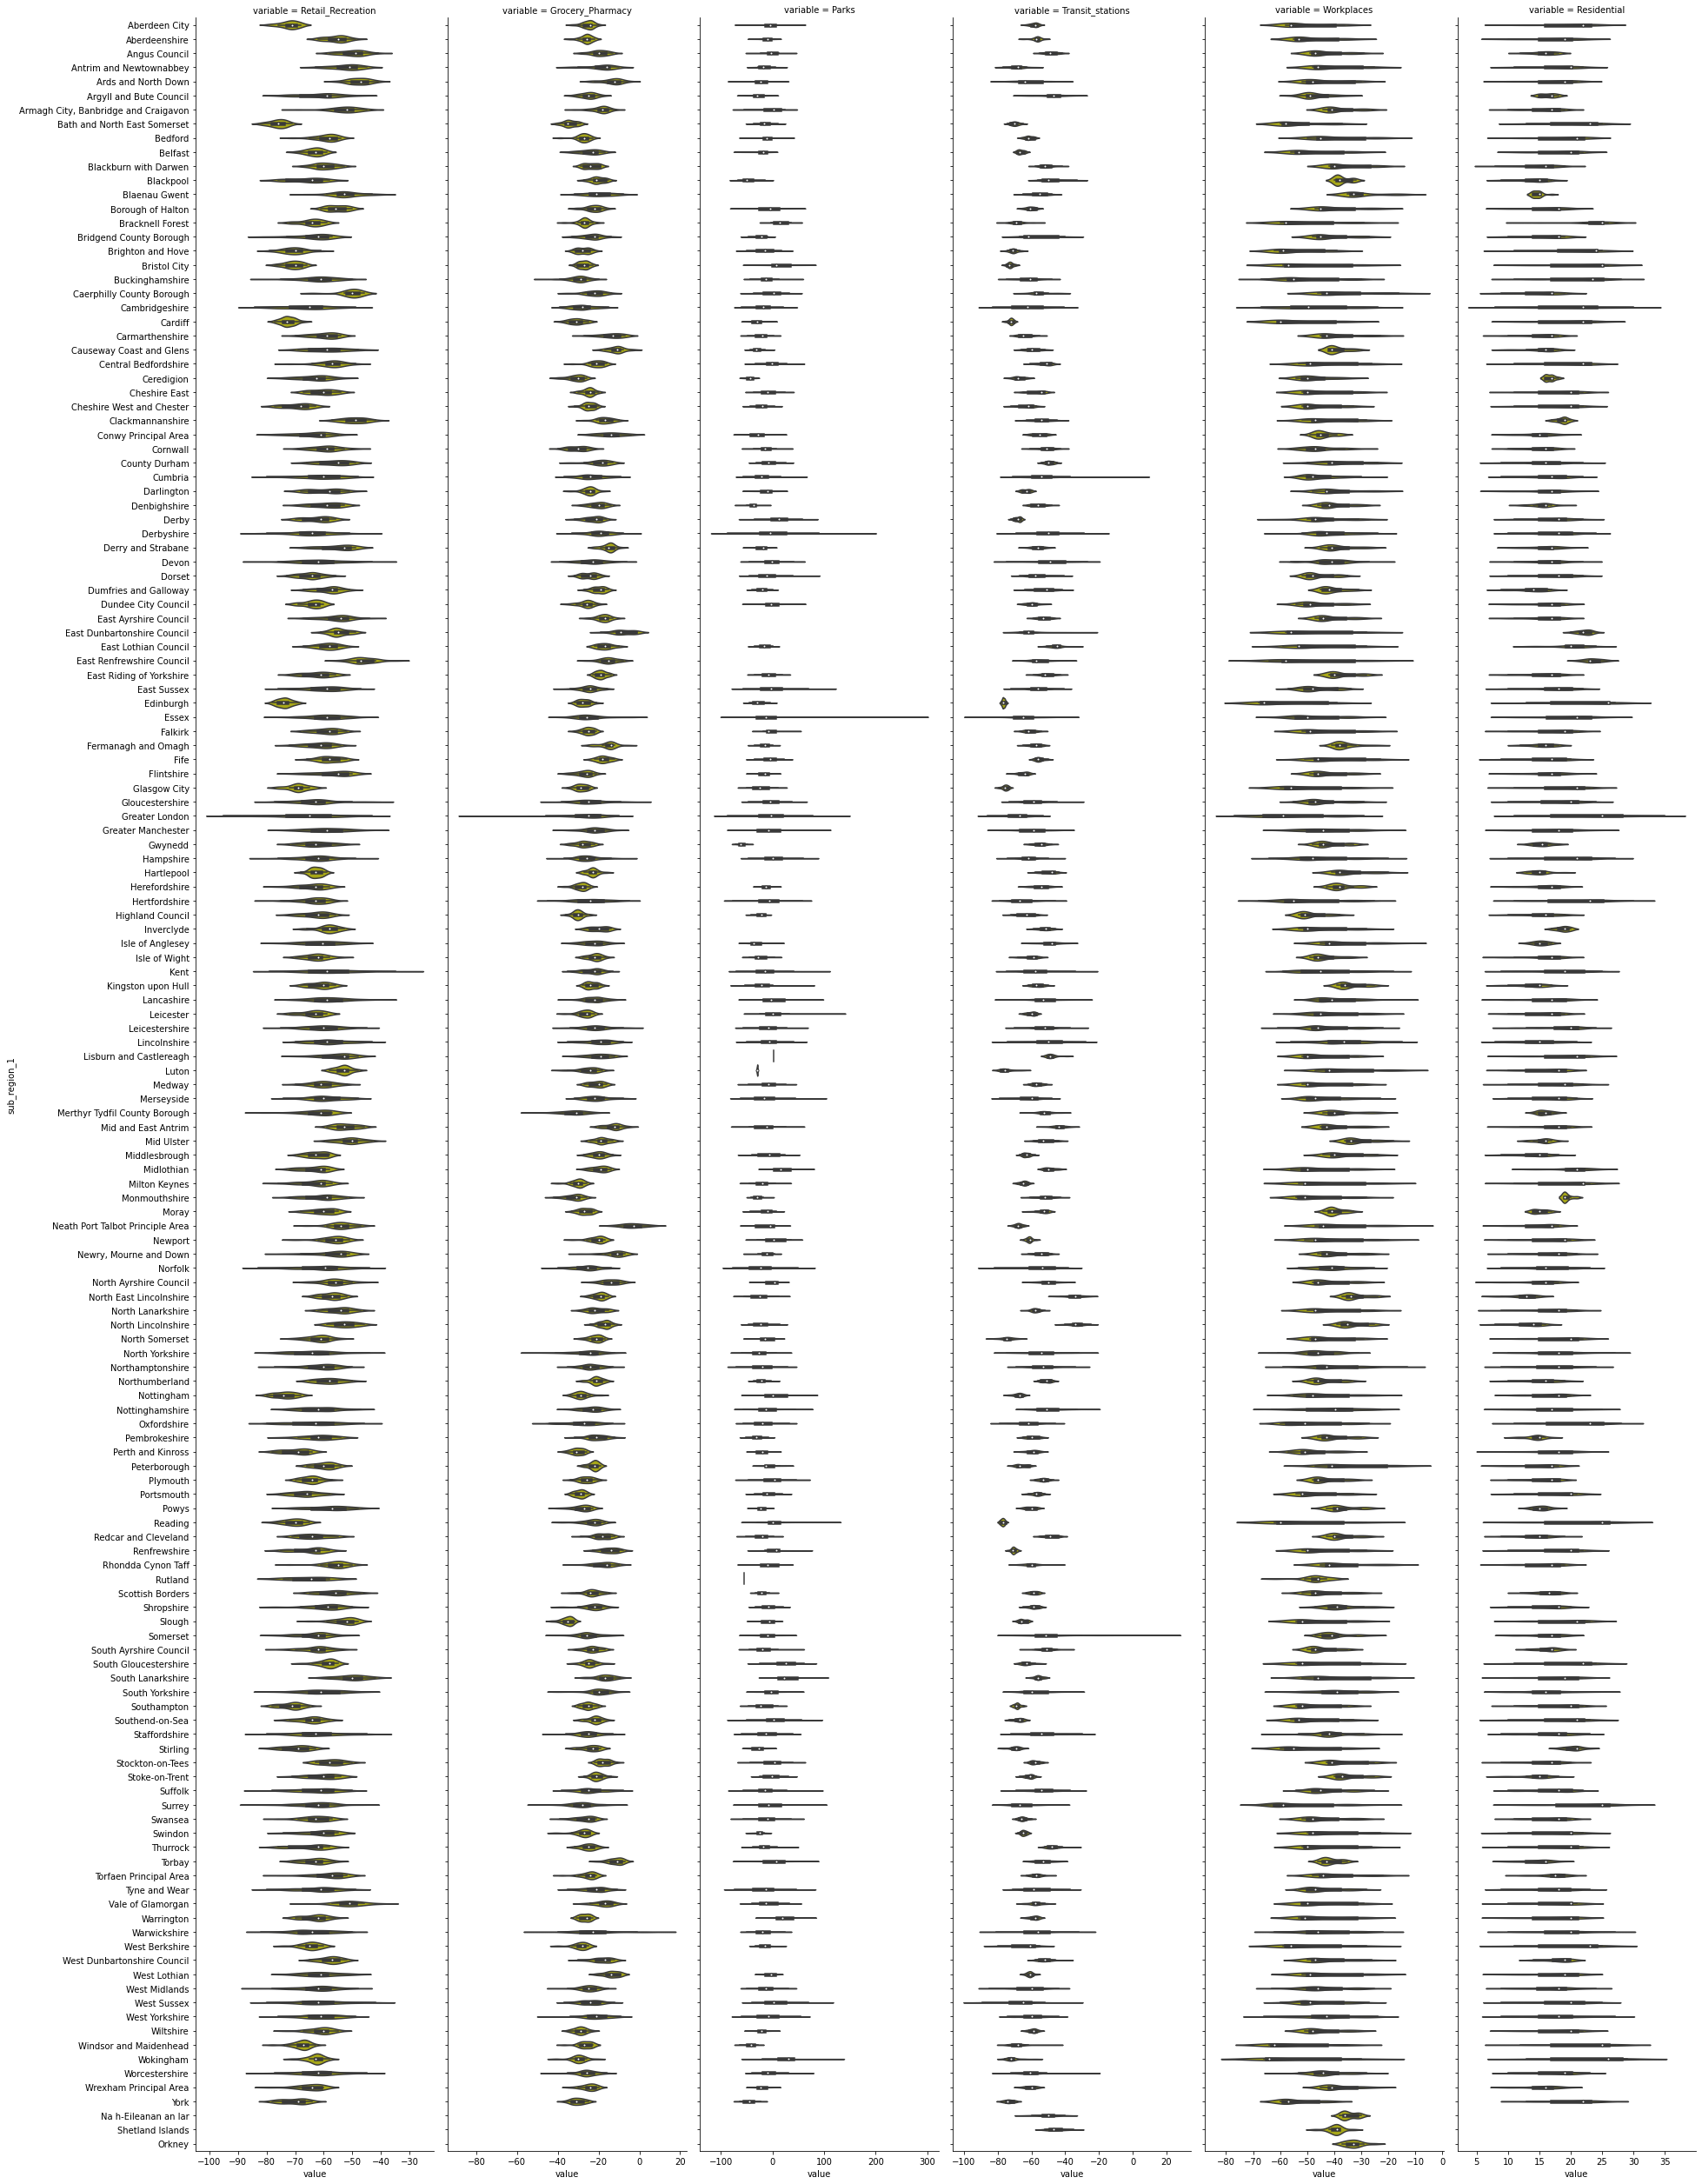

In [78]:
sns.catplot(
    x="value",
    y="sub_region_1",
    col="variable",
    kind="violin",
    sharex=False,
    height=35,
    aspect=0.13,
    color="y",
    data=third_lockdown_UK,
);

In [68]:
third_lockdown_UK_mean = (
    third_lockdown_UK.groupby(["variable", "sub_region_1"])["value"]
    .mean()
    .reset_index()
)
third_lockdown_UK_mean


,variable,sub_region_1,value
0,Grocery_Pharmacy,Aberdeen City,-25.333333
1,Grocery_Pharmacy,Aberdeenshire,-26.190476
2,Grocery_Pharmacy,Angus Council,-19.714286
3,Grocery_Pharmacy,Antrim and Newtownabbey,-18.523810
4,Grocery_Pharmacy,Ards and North Down,-13.285714
...,...,...,...
871,Workplaces,Windsor and Maidenhead,-54.952381
872,Workplaces,Wokingham,-55.714286
873,Workplaces,Worcestershire,-42.469388
874,Workplaces,Wrexham Principal Area,-38.428571


In [69]:

third_lockdown_UK_mean_sorted = third_lockdown_UK_mean.sort_values(
    by=[
        "variable",
        "value",
    ],
    ascending=False,
)[["sub_region_1", "variable", "value"]]
third_lockdown_UK_mean_sorted

,sub_region_1,variable,value
737,Blaenau Gwent,Workplaces,-29.523810
803,Mid Ulster,Workplaces,-31.142857
816,North East Lincolnshire,Workplaces,-32.523810
825,Orkney,Workplaces,-32.866667
818,North Lincolnshire,Workplaces,-33.380952
...,...,...,...
25,Ceredigion,Grocery_Pharmacy,-31.142857
83,Monmouthshire,Grocery_Pharmacy,-32.095238
77,Merthyr Tydfil County Borough,Grocery_Pharmacy,-32.761905
7,Bath and North East Somerset,Grocery_Pharmacy,-34.095238


In [91]:
for i in variabl:
    t_min=third_lockdown_UK_mean_sorted[third_lockdown_UK_mean_sorted['variable']==i].iloc[0]
    t_max=third_lockdown_UK_mean_sorted[third_lockdown_UK_mean_sorted['variable']==i].iloc[-1]
    
    print(f'min change is for {i} is {t_min.sub_region_1} with value of {t_min.value}')
    print(f'max change is for {i} is {t_max.sub_region_1} with value of {t_max.value}')
    print('\n')

min change is for Retail_Recreation is East Renfrewshire Council with value of -46.19047619047619
max change is for Retail_Recreation is Bath and North East Somerset with value of -76.0


min change is for Grocery_Pharmacy is Neath Port Talbot Principle Area with value of -3.2857142857142856
max change is for Grocery_Pharmacy is Slough with value of -35.523809523809526


min change is for Parks is South Lanarkshire with value of 31.285714285714285
max change is for Parks is Gwynedd with value of -59.714285714285715


min change is for Transit_stations is North Lincolnshire with value of -33.285714285714285
max change is for Transit_stations is Reading with value of -77.19047619047619


min change is for Workplaces is Blaenau Gwent with value of -29.523809523809526
max change is for Workplaces is Edinburgh with value of -59.23809523809524


min change is for Residential is Wokingham with value of 23.857142857142858
max change is for Residential is North East Lincolnshire with value of 1

In [70]:
third_lockdown_UK_descriptive_stats = (
    third_lockdown_UK.groupby(["sub_region_1", "variable"])["value"]
    .agg([min, max, np.mean, np.median, np.std])
    .reset_index()
)
third_lockdown_UK_descriptive_stats

,sub_region_1,variable,min,max,mean,median,std
0,Aberdeen City,Grocery_Pharmacy,-33.0,-20.0,-25.333333,-24.0,2.921187
1,Aberdeen City,Parks,-51.0,42.0,-3.142857,-4.0,20.060622
2,Aberdeen City,Residential,11.0,24.0,19.809524,22.0,4.319943
3,Aberdeen City,Retail_Recreation,-79.0,-68.0,-72.047619,-71.0,3.138092
4,Aberdeen City,Transit_stations,-64.0,-55.0,-58.619048,-58.0,2.290768
...,...,...,...,...,...,...,...
871,York,Parks,-63.0,-22.0,-46.190476,-45.0,10.975514
872,York,Residential,13.0,25.0,20.666667,22.0,3.799123
873,York,Retail_Recreation,-78.0,-64.0,-70.571429,-69.0,4.307800
874,York,Transit_stations,-78.0,-69.0,-73.380952,-74.0,2.578298


In [82]:
third_lockdown_UK_descriptive_stats[
    third_lockdown_UK_descriptive_stats["variable"] == "Retail_Recreation"
].sort_values(by="median")

,sub_region_1,variable,min,max,mean,median,std
44,Bath and North East Somerset,Retail_Recreation,-82.0,-71.0,-76.000000,-76.0,2.898275
575,Nottingham,Retail_Recreation,-80.0,-68.0,-73.619048,-74.0,3.513918
284,Edinburgh,Retail_Recreation,-78.0,-69.0,-73.809524,-74.0,2.400397
126,Cardiff,Retail_Recreation,-77.0,-67.0,-72.523810,-73.0,2.441701
3,Aberdeen City,Retail_Recreation,-79.0,-68.0,-72.047619,-71.0,3.138092
...,...,...,...,...,...,...,...
114,Caerphilly County Borough,Retail_Recreation,-64.0,-46.0,-50.238095,-50.0,3.871754
167,Clackmannanshire,Retail_Recreation,-57.0,-42.0,-49.352941,-49.0,4.076475
15,Angus Council,Retail_Recreation,-58.0,-41.0,-49.904762,-49.0,4.380694
27,Ards and North Down,Retail_Recreation,-56.0,-41.0,-47.857143,-47.0,3.650832


In [83]:
third_lockdown_UK_descriptive_stats[
    third_lockdown_UK_descriptive_stats["variable"] == "Parks"
].sort_values(by="max", ascending=False)

,sub_region_1,variable,min,max,mean,median,std
288,Essex,Parks,-69.0,270.0,-3.511737,-12.0,45.749895
213,Derbyshire,Parks,-86.0,168.0,0.476744,-4.5,45.763114
330,Greater London,Parks,-94.0,131.0,-3.167376,-3.0,35.234568
412,Leicester,Parks,-24.0,110.0,5.666667,1.0,28.812035
628,Reading,Parks,-29.0,101.0,6.526316,1.0,28.083939
...,...,...,...,...,...,...,...
847,Windsor and Maidenhead,Parks,-63.0,-27.0,-43.666667,-42.0,9.640194
436,Luton,Parks,-30.0,-29.0,-29.333333,-29.0,0.577350
148,Ceredigion,Parks,-56.0,-33.0,-43.857143,-43.0,6.966245
342,Gwynedd,Parks,-71.0,-45.0,-59.714286,-61.0,6.827466


# second lockdown

In [94]:
second_lockdown_UK_mean = (
    second_lockdown_UK.groupby(["variable", "sub_region_1"])["value"]
    .mean()
    .reset_index()
)



In [95]:

second_lockdown_UK_mean_sorted = second_lockdown_UK_mean.sort_values(
    by=[
        "variable",
        "value",
    ],
    ascending=False,
)[["sub_region_1", "variable", "value"]]


In [96]:
for i in variabl:
    t_min=second_lockdown_UK_mean_sorted[second_lockdown_UK_mean_sorted['variable']==i].iloc[0]
    t_max=second_lockdown_UK_mean_sorted[second_lockdown_UK_mean_sorted['variable']==i].iloc[-1]
    
    print(f'min change is for {i} is {t_min.sub_region_1} with value of {t_min.value}')
    print(f'max change is for {i} is {t_max.sub_region_1} with value of {t_max.value}')
    print('\n')

min change is for Retail_Recreation is Moray with value of -14.523809523809524
max change is for Retail_Recreation is Bath and North East Somerset with value of -69.42857142857143


min change is for Grocery_Pharmacy is Neath Port Talbot Principle Area with value of 12.047619047619047
max change is for Grocery_Pharmacy is Slough with value of -24.952380952380953


min change is for Parks is Bridgend County Borough with value of 46.833333333333336
max change is for Parks is Rutland with value of -51.0


min change is for Transit_stations is East Lothian Council with value of -27.61904761904762
max change is for Transit_stations is Luton with value of -73.23809523809524


min change is for Workplaces is Moray with value of -17.857142857142858
max change is for Workplaces is Greater London with value of -46.78954802259887


min change is for Residential is Wokingham with value of 19.476190476190474
max change is for Residential is Moray with value of 6.777777777777778




In [97]:
second_lockdown_UK_descriptive_stats = (
    second_lockdown_UK.groupby(["sub_region_1", "variable"])["value"]
    .agg([min, max, np.mean, np.median, np.std])
    .reset_index()
)
second_lockdown_UK_descriptive_stats

,sub_region_1,variable,min,max,mean,median,std
0,Aberdeen City,Grocery_Pharmacy,-15.0,-1.0,-7.238095,-7.0,3.192253
1,Aberdeen City,Parks,-28.0,57.0,3.809524,-2.0,21.720081
2,Aberdeen City,Residential,6.0,16.0,12.428571,14.0,3.295018
3,Aberdeen City,Retail_Recreation,-42.0,-32.0,-36.857143,-37.0,2.574601
4,Aberdeen City,Transit_stations,-46.0,-37.0,-40.571429,-40.0,2.693908
...,...,...,...,...,...,...,...
871,York,Parks,-58.0,-5.0,-28.809524,-24.0,15.028703
872,York,Residential,12.0,20.0,17.380952,18.0,2.479439
873,York,Retail_Recreation,-73.0,-53.0,-60.619048,-59.0,6.468974
874,York,Transit_stations,-75.0,-59.0,-64.761905,-63.0,4.657304


# first lockdown

In [99]:
first_lockdown_UK_mean = (
    first_lockdown_UK.groupby(["variable", "sub_region_1"])["value"]
    .mean()
    .reset_index()
)
first_lockdown_UK_mean_sorted = first_lockdown_UK_mean.sort_values(
    by=[
        "variable",
        "value",
    ],
    ascending=False,
)[["sub_region_1", "variable", "value"]]
for i in variabl:
    t_min=first_lockdown_UK_mean_sorted[first_lockdown_UK_mean_sorted['variable']==i].iloc[0]
    t_max=first_lockdown_UK_mean_sorted[first_lockdown_UK_mean_sorted['variable']==i].iloc[-1]
    
    print(f'min change is for {i} is {t_min.sub_region_1} with value of {t_min.value}')
    print(f'max change is for {i} is {t_max.sub_region_1} with value of {t_max.value}')
    print('\n')

min change is for Retail_Recreation is East Renfrewshire Council with value of -64.4
max change is for Retail_Recreation is Bath and North East Somerset with value of -86.38095238095238


min change is for Grocery_Pharmacy is East Renfrewshire Council with value of -18.19047619047619
max change is for Grocery_Pharmacy is Monmouthshire with value of -45.333333333333336


min change is for Parks is South Gloucestershire with value of 5.0
max change is for Parks is Lisburn and Castlereagh with value of -75.33333333333333


min change is for Transit_stations is Scottish Borders with value of -44.19047619047619
max change is for Transit_stations is Luton with value of -86.0952380952381


min change is for Workplaces is North East Lincolnshire with value of -53.57142857142857
max change is for Workplaces is Edinburgh with value of -76.76190476190476


min change is for Residential is Wokingham with value of 32.23076923076923
max change is for Residential is Pembrokeshire with value of 18.0



In [100]:
first_lockdown_UK_descriptive_stats = (
    first_lockdown_UK.groupby(["sub_region_1", "variable"])["value"]
    .agg([min, max, np.mean, np.median, np.std])
    .reset_index()
)
second_lockdown_UK_descriptive_stats

,sub_region_1,variable,min,max,mean,median,std
0,Aberdeen City,Grocery_Pharmacy,-15.0,-1.0,-7.238095,-7.0,3.192253
1,Aberdeen City,Parks,-28.0,57.0,3.809524,-2.0,21.720081
2,Aberdeen City,Residential,6.0,16.0,12.428571,14.0,3.295018
3,Aberdeen City,Retail_Recreation,-42.0,-32.0,-36.857143,-37.0,2.574601
4,Aberdeen City,Transit_stations,-46.0,-37.0,-40.571429,-40.0,2.693908
...,...,...,...,...,...,...,...
871,York,Parks,-58.0,-5.0,-28.809524,-24.0,15.028703
872,York,Residential,12.0,20.0,17.380952,18.0,2.479439
873,York,Retail_Recreation,-73.0,-53.0,-60.619048,-59.0,6.468974
874,York,Transit_stations,-75.0,-59.0,-64.761905,-63.0,4.657304


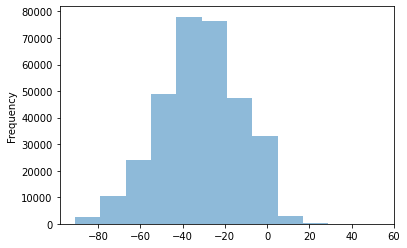

In [92]:
ax = data["Workplaces"].plot.hist(bins=12, alpha=0.5)

In [93]:
data.iloc[:, 9:15].mean()

Retail_Recreation   -25.628914
Grocery_Pharmacy     -3.427401
Parks                30.829508
Transit_stations    -32.848772
Workplaces          -32.167015
Residential          10.469924
dtype: float64

In [95]:
data.iloc[:, 9:15].std()

Retail_Recreation    27.519923
Grocery_Pharmacy     17.430261
Parks                55.238187
Transit_stations     24.075431
Workplaces           19.088629
Residential           7.068883
dtype: float64

In [101]:
UK_mean = data.groupby("sub_region_1")[
    [
        "Retail_Recreation",
        "Grocery_Pharmacy",
        "Parks",
        "Transit_stations",
        "Workplaces",
        "Residential",
    ]
].mean()

# Check the data in the DataFrame of mean mobility change we computed
UK_mean.head()

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential
sub_region_1,,,,,,
Aberdeen City,-38.800515,-3.892670,14.851802,-40.639640,-38.903475,12.197128
Aberdeenshire,-17.288918,-6.057592,28.317881,-38.360158,-32.154440,10.001319
Angus Council,-14.431398,-1.850923,18.748106,-29.073879,-30.151866,8.887805
Antrim and Newtownabbey,-19.798153,-2.240106,-26.127660,-40.439314,-30.236808,10.613605
Ards and North Down,-18.643799,7.485488,12.363515,-36.190588,-32.114543,10.558863


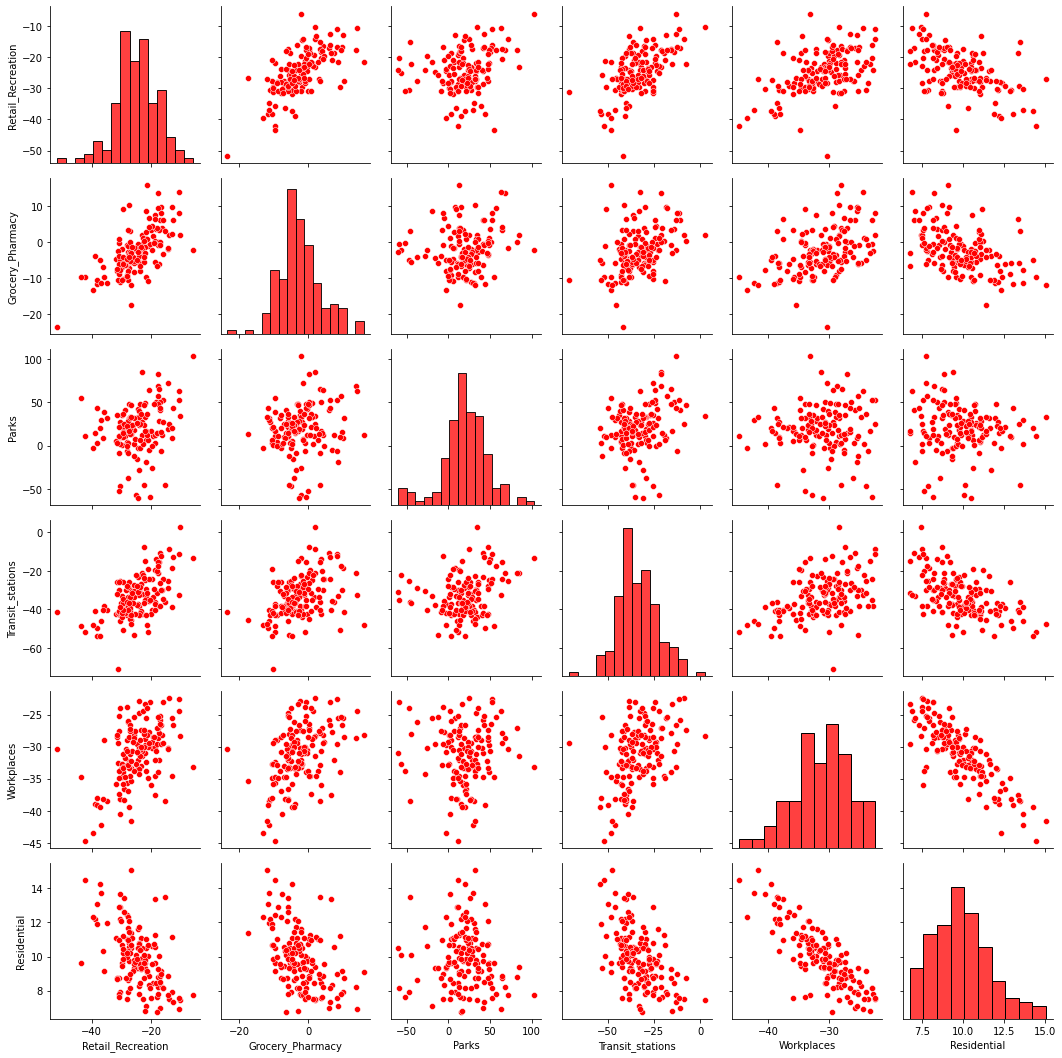

In [102]:
grid = sns.PairGrid(UK_mean)
grid.map_diag(sns.histplot, color="r")
grid.map_offdiag(sns.scatterplot, color="r")

In [105]:
# Compute pairwise correlation between our six mobility categories
# using the original (non-aggregated) mobility_trends_UK DataFrame.
mobility_trends_UK_corr = data.iloc[:, 9:15].corr()
mobility_trends_UK_corr

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential
Retail_Recreation,1.000000,0.774223,0.422229,0.685147,0.519476,-0.695228
Grocery_Pharmacy,0.774223,1.000000,0.431409,0.555065,0.440429,-0.511430
Parks,0.422229,0.431409,1.000000,0.388513,0.106138,-0.199375
Transit_stations,0.685147,0.555065,0.388513,1.000000,0.578451,-0.663171
Workplaces,0.519476,0.440429,0.106138,0.578451,1.000000,-0.888788
Residential,-0.695228,-0.511430,-0.199375,-0.663171,-0.888788,1.000000


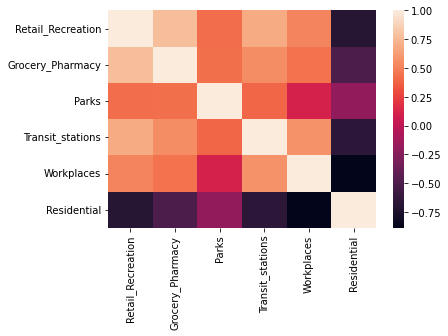

In [106]:
# Plot a heatmap based on the correlation analysis
sns.heatmap(mobility_trends_UK_corr);

In [107]:
UK_NADrop = data.dropna(
    subset=[
        "country_region",
        "sub_region_1",
        "date",
        "Retail_Recreation",
        "Grocery_Pharmacy",
        "Parks",
        "Transit_stations",
        "Workplaces",
        "Residential",
    ]
)

# Number of rows and columns in the DataFrame without NaNs
UK_NADrop.shape

(242309, 16)

In [106]:
UK_NADrop=UK_NADrop.drop(['year', ], axis=1)

# linear regression

In [122]:
for i in range(len(variabl)):
    for j in range(i+1,len(variabl)):
        print(f'for {variabl[i]} and {variabl[j]} linear regression val is')
        model_outputs = stats.linregress(
        UK_NADrop[variabl[i]], UK_NADrop[variabl[j]])
        print(model_outputs)
        print('\n')


for Retail_Recreation and Grocery_Pharmacy linear regression val is
LinregressResult(slope=0.4827166466083039, intercept=9.179190254423677, rvalue=0.7723367031159675, pvalue=0.0, stderr=0.0008065331968265191, intercept_stderr=0.03024567938580045)


for Retail_Recreation and Parks linear regression val is
LinregressResult(slope=0.8116073658003042, intercept=53.11541383543086, rvalue=0.4009359906770533, pvalue=0.0, stderr=0.0037673304605785763, intercept_stderr=0.14127808960544078)


for Retail_Recreation and Transit_stations linear regression val is
LinregressResult(slope=0.6237201227403455, intercept=-16.836897638940602, rvalue=0.7096518046916471, pvalue=0.0, stderr=0.0012579832653335256, intercept_stderr=0.04717544010053215)


for Retail_Recreation and Workplaces linear regression val is
LinregressResult(slope=0.3865795292388424, intercept=-21.677463348200114, rvalue=0.5377346771428168, pvalue=0.0, stderr=0.001231329234127156, intercept_stderr=0.0461758913090143)


for Retail_Recreati

No handles with labels found to put in legend.


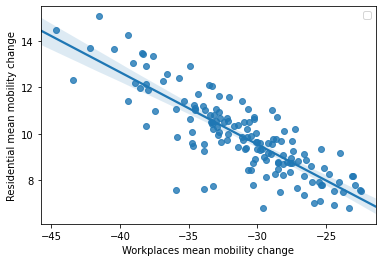

In [111]:
fig = sns.regplot(
    x="Workplaces",
    y="Residential",
#     label="r = {0:.3}, p-value < {1:.3}".format(r_value, 0.001),
    data=UK_mean,
)
fig.set(
    xlabel="Workplaces mean mobility change", ylabel="Residential mean mobility change"
)
fig.legend()

In [125]:
for i in range(len(variabl)):
    for j in range(i+1,len(variabl)):
        print(f'for {variabl[i]} and {variabl[j]} linear regression val is')
        X = sm.add_constant(UK_NADrop[variabl[i]])
        Y = UK_NADrop[variabl[j]]
        model = sm.OLS(Y, X)
        results = model.fit()

        print_model = results.summary()
        print(print_model)
        print('\n')

for Retail_Recreation and Grocery_Pharmacy linear regression val is
                            OLS Regression Results                            
Dep. Variable:       Grocery_Pharmacy   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                 3.582e+05
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        05:06:20   Log-Likelihood:            -9.1877e+05
No. Observations:              242309   AIC:                         1.838e+06
Df Residuals:                  242307   BIC:                         1.838e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:            Residential   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     9854.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        05:06:20   Log-Likelihood:            -8.2130e+05
No. Observations:              242309   AIC:                         1.643e+06
Df Residuals:                  242307   BIC:                         1.643e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4316      0.017    676.938      0.0

# after lockdown improvements


In [126]:
first_lockdown_UK = data_long[
    (data_long["country_region"] == "United Kingdom")
    & (data_long["date"] >= "2020-04-13")
    & (data_long["date"] <= "2020-11-05")
]

second_lockdown_UK = data_long[
    (data_long["country_region"] == "United Kingdom")
    & (data_long["date"] >= "2020-11-25")
    & (data_long["date"] <= "2021-01-06")
]

third_lockdown_UK = data_long[
    (data_long["country_region"] == "United Kingdom")
    & (data_long["date"] >= "2021-01-26")
   
]

In [127]:
lockdowns_dataframes = [first_lockdown_UK, second_lockdown_UK, third_lockdown_UK]
three_lockdowns_UK = pd.concat(
    lockdowns_dataframes,
    keys=["first_lockdown_UK", "second_lockdown_UK", "third_lockdown_UK"],
).reset_index()


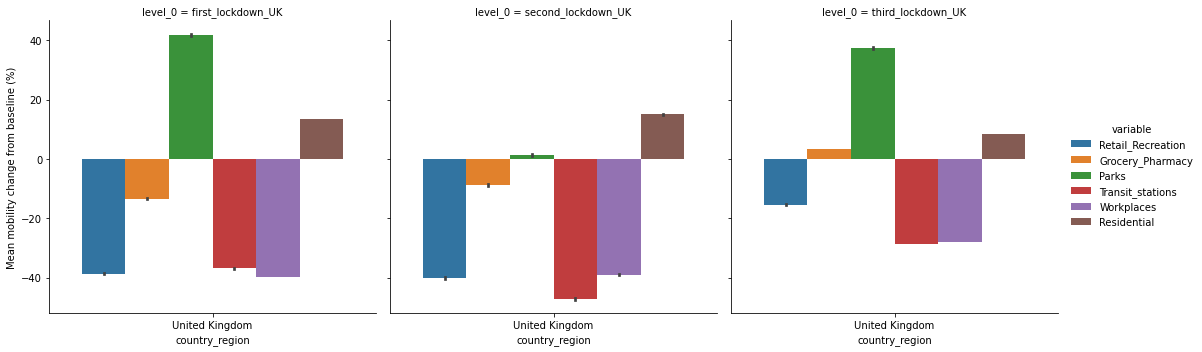

In [128]:
# Display the three lockdowns as a catplot multi-plot
grid = sns.catplot(
    kind="bar",
    x="country_region",
    y="value",
    hue="variable",
    col="level_0",
    data=three_lockdowns_UK,
)
grid.set_ylabels("Mean mobility change from baseline (%)")

In [129]:
third_lockdown_UK_mean = (
    third_lockdown_UK.groupby(["variable", "sub_region_1"])["value"]
    .mean()
    .reset_index()
)
third_lockdown_UK_mean


,variable,sub_region_1,value
0,Grocery_Pharmacy,Aberdeen City,4.121281
1,Grocery_Pharmacy,Aberdeenshire,0.391304
2,Grocery_Pharmacy,Angus Council,3.462243
3,Grocery_Pharmacy,Antrim and Newtownabbey,4.901602
4,Grocery_Pharmacy,Ards and North Down,16.707094
...,...,...,...
876,Workplaces,Windsor and Maidenhead,-37.267735
877,Workplaces,Wokingham,-37.970252
878,Workplaces,Worcestershire,-27.209546
879,Workplaces,Wrexham Principal Area,-24.196796


In [130]:
third_lockdown_UK_mean_sorted = third_lockdown_UK_mean.sort_values(
    by=[
        "variable",
        "value",
    ],
    ascending=False,
)[["sub_region_1", "variable", "value"]]
third_lockdown_UK_mean_sorted

,sub_region_1,variable,value
741,Blackpool,Workplaces,-15.155606
796,Isle of Wight,Workplaces,-15.894737
802,Lincolnshire,Workplaces,-16.794622
845,Shropshire,Workplaces,-17.109840
810,Middlesbrough,Workplaces,-17.812357
...,...,...,...
56,Greater London,Grocery_Pharmacy,-6.331606
50,Falkirk,Grocery_Pharmacy,-6.496568
143,Wokingham,Grocery_Pharmacy,-6.510297
21,Cardiff,Grocery_Pharmacy,-7.908467


In [131]:
for i in variabl:
    t_min=third_lockdown_UK_mean_sorted[third_lockdown_UK_mean_sorted['variable']==i].iloc[0]
    t_max=third_lockdown_UK_mean_sorted[third_lockdown_UK_mean_sorted['variable']==i].iloc[-1]
    
    print(f'min change is for {i} is {t_min.sub_region_1} with value of {t_min.value}')
    print(f'max change is for {i} is {t_max.sub_region_1} with value of {t_max.value}')
    print('\n')

min change is for Retail_Recreation is Cornwall with value of 6.4576659038901605
max change is for Retail_Recreation is Nottingham with value of -34.87185354691076


min change is for Grocery_Pharmacy is Pembrokeshire with value of 28.94724770642202
max change is for Grocery_Pharmacy is Slough with value of -15.302059496567505


min change is for Parks is Cornwall with value of 129.50114416475972
max change is for Parks is West Dunbartonshire Council with value of -56.0


min change is for Transit_stations is Argyll and Bute Council with value of 17.217391304347824
max change is for Transit_stations is Clackmannanshire with value of -53.08571428571429


min change is for Workplaces is Blackpool with value of -15.155606407322654
max change is for Workplaces is Cardiff with value of -41.036613272311214


min change is for Residential is East Renfrewshire Council with value of 13.047923322683706
max change is for Residential is Fermanagh and Omagh with value of 4.432




In [132]:
third_lockdown_UK_descriptive_stats = (
    third_lockdown_UK.groupby(["sub_region_1", "variable"])["value"]
    .agg([min, max, np.mean, np.median, np.std])
    .reset_index()
)
third_lockdown_UK_descriptive_stats

,sub_region_1,variable,min,max,mean,median,std
0,Aberdeen City,Grocery_Pharmacy,-89.0,48.0,4.121281,6.0,11.868022
1,Aberdeen City,Parks,-51.0,112.0,12.828375,8.0,30.650072
2,Aberdeen City,Residential,-1.0,24.0,10.084668,10.0,5.463781
3,Aberdeen City,Retail_Recreation,-93.0,-1.0,-29.384439,-22.0,19.662602
4,Aberdeen City,Transit_stations,-86.0,-18.0,-36.562929,-33.0,11.356960
...,...,...,...,...,...,...,...
876,York,Parks,-77.0,235.0,31.549425,24.0,49.753301
877,York,Residential,-1.0,23.0,9.187643,9.0,5.514496
878,York,Retail_Recreation,-92.0,33.0,-15.283753,-10.0,25.313757
879,York,Transit_stations,-92.0,43.0,-28.382151,-25.0,22.297570


In [133]:
second_lockdown_UK_mean = (
    second_lockdown_UK.groupby(["variable", "sub_region_1"])["value"]
    .mean()
    .reset_index()
)


In [134]:

second_lockdown_UK_mean_sorted = second_lockdown_UK_mean.sort_values(
    by=[
        "variable",
        "value",
    ],
    ascending=False,
)[["sub_region_1", "variable", "value"]]


In [135]:
for i in variabl:
    t_min=second_lockdown_UK_mean_sorted[second_lockdown_UK_mean_sorted['variable']==i].iloc[0]
    t_max=second_lockdown_UK_mean_sorted[second_lockdown_UK_mean_sorted['variable']==i].iloc[-1]
    
    print(f'min change is for {i} is {t_min.sub_region_1} with value of {t_min.value}')
    print(f'max change is for {i} is {t_max.sub_region_1} with value of {t_max.value}')
    print('\n')

min change is for Retail_Recreation is Clackmannanshire with value of -22.2
max change is for Retail_Recreation is Nottingham with value of -58.06976744186046


min change is for Grocery_Pharmacy is Neath Port Talbot Principle Area with value of 9.44186046511628
max change is for Grocery_Pharmacy is Slough with value of -26.906976744186046


min change is for Parks is Nottingham with value of 32.86046511627907
max change is for Parks is Inverclyde with value of -68.0


min change is for Transit_stations is Shropshire with value of -24.686046511627907
max change is for Transit_stations is Orkney with value of -71.0


min change is for Workplaces is Dumfries and Galloway with value of -28.74418604651163
max change is for Workplaces is Edinburgh with value of -50.25581395348837


min change is for Residential is Wokingham with value of 19.976744186046513
max change is for Residential is Dumfries and Galloway with value of 10.093023255813954




In [136]:
first_lockdown_UK_mean = (
    first_lockdown_UK.groupby(["variable", "sub_region_1"])["value"]
    .mean()
    .reset_index()
)
first_lockdown_UK_mean_sorted = first_lockdown_UK_mean.sort_values(
    by=[
        "variable",
        "value",
    ],
    ascending=False,
)[["sub_region_1", "variable", "value"]]
for i in variabl:
    t_min=first_lockdown_UK_mean_sorted[first_lockdown_UK_mean_sorted['variable']==i].iloc[0]
    t_max=first_lockdown_UK_mean_sorted[first_lockdown_UK_mean_sorted['variable']==i].iloc[-1]
    
    print(f'min change is for {i} is {t_min.sub_region_1} with value of {t_min.value}')
    print(f'max change is for {i} is {t_max.sub_region_1} with value of {t_max.value}')
    print('\n')

min change is for Retail_Recreation is Cornwall with value of -13.925373134328359
max change is for Retail_Recreation is Aberdeen City with value of -56.62189054726368


min change is for Grocery_Pharmacy is Neath Port Talbot Principle Area with value of 3.368131868131868
max change is for Grocery_Pharmacy is Wokingham with value of -22.357142857142858


min change is for Parks is Cornwall with value of 118.33888888888889
max change is for Parks is West Dunbartonshire Council with value of -63.25


min change is for Transit_stations is Argyll and Bute Council with value of -8.126373626373626
max change is for Transit_stations is Reading with value of -64.71497584541063


min change is for Workplaces is North East Lincolnshire with value of -29.567164179104477
max change is for Workplaces is Edinburgh with value of -56.61835748792271


min change is for Residential is Wokingham with value of 20.09493670886076
max change is for Residential is Argyll and Bute Council with value of 7.96341